<a href="https://colab.research.google.com/github/mhou426/Reflex-Based-Agents-for-the-Vacuum/blob/main/Copy_of_robot_vacuum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SBU CSE 352 - HW 1 -  Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

---

All student names in group: [Jordan Cassella, John Bilello, Mingrong Hou]

I understand that my submission needs to be my own group's work: [JC, JB, MH]

I understand that ChatGPT / Copilot / other AI tools are not allowed: [JC, JB, MH]

## Instructions

Total Points: 100

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Only use standard packages (numpy, scipy, and built-in packages like random). Submit the completely rendered notebook as a HTML file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: west
step 1 - action: north
step 2 - action: south
step 3 - action: south
step 4 - action: suck
step 5 - action: suck
step 6 - action: north
step 7 - action: suck
step 8 - action: east
step 9 - action: east
step 10 - action: south
step 11 - action: west
step 12 - action: suck
step 13 - action: suck
step 14 - action: east
step 15 - action: east
step 16 - action: north
step 17 - action: north
step 18 - action: suck
step 19 - action: north


6

# Tasks

## General [10 Points]

1. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design, for example. If it makes your code more simple objects are okay, but try to keep the code as simple as possible.
2. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
3. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
# Description: Create a 2D array representing an nxn room. Fill in 1’s into the room squares to represent dirty slots with 20% probability, and
# clean squares are 0’s with 80% probability. Then the environment places the agent in a random location, and initializes the
# bumper status based on the agent’s location. Then, it enters a loop that starts the agent-environment interaction. If a square is dirty and
#the agent’s action is to suck, the environment updates the status of the square and the total number of dirty squares. If the action isn’t to suck,
# the environment updates the agent’s location and bumper status.

import numpy as np
import random
n = 5

def set_n(x):
    global n
    n = x


def reset_state():
    global state
    state = {"last_action": "east", "corner_mode": False, "agent_x": 0, "agent_y": 0}


def simulation_environment(agent, max_steps, verbose = True):
    global n
    if(n == 0): set_n(5)
    num_actions = 0
    num_dirty_squares = 0
    room = [[0] * n for _ in range(n)]

    # Initialize the environment by storing the state of each square
    for x in range(0, n):
      for y in range(0, n):
        #mark as dirty 20%
        if random.random() < 0.2:
          room[x][y] = 1
          num_dirty_squares += 1

        #mark as clean
        else:
          room[x][y] = 0
    #Keep track of agent
    agent_pos = [random.randrange(n), random.randrange(n)] #start agent at random pos

    north = agent_pos[1] == 0
    south = agent_pos[1] == n - 1
    east = agent_pos[0] == n - 1
    west = agent_pos[0] == 0

    # Create bumpers and dirty to prepare sensor inputs
    bumpers = {"north" : north, "south" : south, "west" : west, "east" : east}

    #Print start position:
    if verbose:
        print("starting position: " + str(agent_pos))
    #Call the agent function repeatedly and provide the agent function with the sensor inputs
    for i in range(max_steps):
        dirty = room[agent_pos[0]][agent_pos[1]] == 1
        action = agent(bumpers, dirty)

        # Update dirty status
        if dirty and action == "suck":
            room[agent_pos[0]][agent_pos[1]] = 0 # 0 means not dirty. 1 means dirty.
            num_dirty_squares -= 1

        # Update agent location if vacuum didn't suck
        if action != "suck":
            if not ((bumpers["north"] and action == "north") or (bumpers["south"] and action == "south") or (bumpers["east"] and action == "east") or (bumpers["west"] and action == "west")): #All conditions represent when agent is on bumper
                num_actions += 1  # Update energy (number of actions)
                if action == "north":
                    agent_pos[1] -= 1
                    if agent_pos[1] == 0:
                        bumpers["north"] = True
                    else:
                        bumpers["south"] = False
                elif action == "south":
                    agent_pos[1] += 1
                    if agent_pos[1] == n - 1:
                        bumpers["south"] = True
                    else:
                        bumpers["north"] = False
                elif action == "east":
                    agent_pos[0] += 1
                    if agent_pos[0] == n - 1:
                        bumpers["east"] = True
                    else:
                        bumpers["west"] = False
                else:
                    agent_pos[0] -= 1
                    if agent_pos[0] == 0:
                        bumpers["west"] = True
                    else:
                        bumpers["east"] = False
        # Print step and action and pos
        if (verbose): print("step", i , "- action:", action, ", position", agent_pos)
        # Check if all squares are clean
        if num_dirty_squares == 0:
            break
    reset_state()
    return num_actions

print(simulation_environment(simple_randomized_agent, max_steps = 100000))

starting position: [3, 0]
step 0 - action: south , position [3, 1]
step 1 - action: east , position [4, 1]
step 2 - action: west , position [3, 1]
step 3 - action: west , position [2, 1]
step 4 - action: suck , position [2, 1]
step 5 - action: south , position [2, 2]
step 6 - action: west , position [1, 2]
step 7 - action: north , position [1, 1]
step 8 - action: east , position [2, 1]
step 9 - action: suck , position [2, 1]
step 10 - action: south , position [2, 2]
step 11 - action: suck , position [2, 2]
step 12 - action: south , position [2, 3]
step 13 - action: suck , position [2, 3]
step 14 - action: south , position [2, 4]
step 15 - action: north , position [2, 3]
step 16 - action: suck , position [2, 3]
step 17 - action: suck , position [2, 3]
step 18 - action: east , position [3, 3]
step 19 - action: suck , position [3, 3]
step 20 - action: suck , position [3, 3]
step 21 - action: suck , position [3, 3]
step 22 - action: suck , position [3, 3]
step 23 - action: south , position

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [ ]:
# Description: The agent will randomly select an action, as long as the action is considered valid. If the bumper doesn’t indicate that you are on
# the edge of the room in a particular direction, then a valid action would be to move in that particular direction.

#Simple reflex agent program
def simple_reflex_agent(bumpers, dirty):
    if dirty:
        return "suck"
    actions = ["north", "east", "west", "south"]
    action = np.random.choice(actions)
    while True:
        if bumpers[action]:
            action = np.random.choice(actions)
            if not bumpers[action]:
                break
        else:
            break
    return action

print(simulation_environment(simple_reflex_agent, max_steps = 100000))


starting position: [1, 4]
step 0 - action: north , position [1, 3]
step 1 - action: suck , position [1, 3]
step 2 - action: north , position [1, 2]
step 3 - action: south , position [1, 3]
step 4 - action: south , position [1, 4]
step 5 - action: east , position [2, 4]
step 6 - action: east , position [3, 4]
step 7 - action: west , position [2, 4]
step 8 - action: east , position [3, 4]
step 9 - action: north , position [3, 3]
step 10 - action: suck , position [3, 3]
step 11 - action: north , position [3, 2]
step 12 - action: north , position [3, 1]
step 13 - action: south , position [3, 2]
step 14 - action: north , position [3, 1]
step 15 - action: east , position [4, 1]
step 16 - action: suck , position [4, 1]
step 17 - action: north , position [4, 0]
step 18 - action: south , position [4, 1]
step 19 - action: west , position [3, 1]
step 20 - action: east , position [4, 1]
step 21 - action: west , position [3, 1]
step 22 - action: west , position [2, 1]
step 23 - action: north , posi

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# Your short description of the state and your implementation goes here:
# To maintain the internal state of the agent, there is a global variable that is a dictionary. It maintains information like the last action the
# agent took, the agent’s position, and a boolean variable that indicates whether the agent is in “corner mode.”

# For the transition model, the agent knows that if it gets to the top left corner, it understands its position in the room, and it can activate
# “corner mode.” The agent knows n, so it knows that it only has to move at most n-1 positions in any direction to get to an edge. Once the agent enters
# “corner mode” it will move laterally, sucking up any dirt on the way, and once it hits the edge of the room, it moves down and laterally once again.
# It repeats until all dirt has been picked up. For the sensor model, the agent only knows if a square is dirty if it is standing on the square. It
# cannot see if a square is dirty if it’s not standing on it. The rule is to suck if the agent is standing on a dirty square. The action variable stores
# an action value.


In [ ]:
state = {"last_action": "east", "corner_mode": False, "agent_x": 0, "agent_y": 0}  # [last_move, corner_mode, agent_x, agent_y]
#Model-Based Reflex Agent program
def model_based_agent(bumpers, dirty):
    global state
    global n
    # Case 1: Not in Corner Mode
    if not state["corner_mode"]:
    # Check bumpers and determine the action: If not in top left corner, move west and north until we are in top left. If we are in top left corner, choose action and update state(corner mode=true)
        if bumpers["north"] and bumpers["west"]:
            if dirty:
                return "suck"
            else:
                state["agent_x"] += 1
                state["corner_mode"] = True
                return "east"
        else:
            if not bumpers["west"]:
                return "west"
            return "north"
    else:
    # Case 2: In Corner Mode
    # If dirty, suck. Else, (check if state_last_action = "south", then move laterally based on bumpers) (check if bumper[state_last_action] = False then return state_last_action. else, return "south")
        if dirty:
            return "suck"
        elif state["last_action"] == "south":
            if state["agent_x"] == n-1:
                state["agent_x"] -= 1
                state["last_action"] = "west"
                return "west"
            else:
                state["agent_x"] += 1
                state["last_action"] = "east"
                return "east"
        elif state["agent_x"] == 0 or state["agent_x"] == n-1:
            state["agent_y"] += 1
            state["last_action"] = "south"
            return "south"
        else:
            if state["last_action"] == "west":
                state["agent_x"] -= 1
            else:
                state["agent_x"] += 1
            return state["last_action"]

print(simulation_environment(model_based_agent, max_steps = 100000))


starting position: [2, 0]
step 0 - action: west , position [1, 0]
step 1 - action: west , position [0, 0]
step 2 - action: east , position [1, 0]
step 3 - action: suck , position [1, 0]
step 4 - action: east , position [2, 0]
step 5 - action: east , position [3, 0]
step 6 - action: east , position [4, 0]
step 7 - action: south , position [4, 1]
step 8 - action: west , position [3, 1]
step 9 - action: west , position [2, 1]
step 10 - action: suck , position [2, 1]
step 11 - action: west , position [1, 1]
step 12 - action: suck , position [1, 1]
step 13 - action: west , position [0, 1]
step 14 - action: south , position [0, 2]
step 15 - action: east , position [1, 2]
step 16 - action: east , position [2, 2]
step 17 - action: east , position [3, 2]
step 18 - action: east , position [4, 2]
step 19 - action: suck , position [4, 2]
step 20 - action: south , position [4, 3]
step 21 - action: west , position [3, 3]
step 22 - action: west , position [2, 3]
step 23 - action: west , position [1, 

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each with 100000 max steps. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

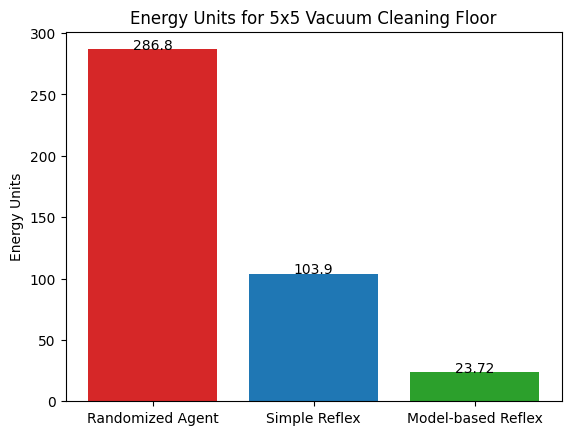

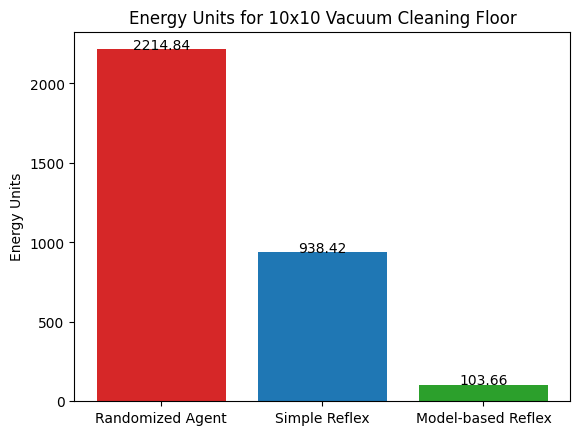

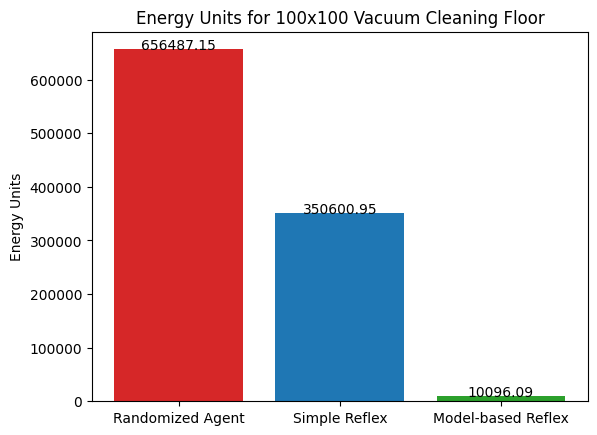

In [ ]:
import matplotlib.pyplot as plt
def iterate_simulation(max_steps, num_runs):
    # Simulate 5x5

    values_n5_random = []
    values_n5_simple = []
    values_n5_model = []
    set_n(5)
    for i in range(num_runs):
        values_n5_random.append(simulation_environment(simple_randomized_agent, max_steps, False))
        values_n5_simple.append(simulation_environment(simple_reflex_agent, max_steps, False))
        values_n5_model.append(simulation_environment(model_based_agent, max_steps, False))
    # Simulate 10x10
    values_n10_random = []
    values_n10_simple = []
    values_n10_model = []
    set_n(10)
    for i in range(num_runs):
        values_n10_random.append(simulation_environment(simple_randomized_agent, max_steps, False))
        values_n10_simple.append(simulation_environment(simple_reflex_agent, max_steps, False))
        values_n10_model.append(simulation_environment(model_based_agent, max_steps, False))
    # Simulate 100x100
    values_n100_random = []
    values_n100_simple = []
    values_n100_model = []
    set_n(100)
    for i in range(num_runs):
        values_n100_random.append(simulation_environment(simple_randomized_agent, max_steps, False))
        values_n100_simple.append(simulation_environment(simple_reflex_agent, max_steps, False))
        values_n100_model.append(simulation_environment(model_based_agent, max_steps, False))

    # Visualize using bar chart

    #5x5
    fig, ax = plt.subplots()

    agents = ['Randomized Agent', 'Simple Reflex', 'Model-based Reflex']
    energy = [sum(values_n5_random) / len(values_n5_random), sum(values_n5_simple) / len(values_n5_simple), sum(values_n5_model) / len(values_n5_model)]
    labels = ['red', 'blue', 'green']
    colors = ['tab:red', 'tab:blue', 'tab:green']
    ax.bar(agents, energy, label=labels, color=colors)
    ax.set_ylabel('Energy Units')
    ax.set_title('Energy Units for 5x5 Vacuum Cleaning Floor')
    for i in range(len(agents)):
        plt.text(i, energy[i], energy[i], ha='center')
    plt.show()

    # 10x10
    fig, ax = plt.subplots()

    agents = ['Randomized Agent', 'Simple Reflex', 'Model-based Reflex']
    energy = [sum(values_n10_random) / len(values_n10_random), sum(values_n10_simple) / len(values_n10_simple),
              sum(values_n10_model) / len(values_n10_model)]
    labels = ['red', 'blue', 'green']
    colors = ['tab:red', 'tab:blue', 'tab:green']
    ax.bar(agents, energy, label=labels, color=colors)
    ax.set_ylabel('Energy Units')
    ax.set_title('Energy Units for 10x10 Vacuum Cleaning Floor')
    for i in range(len(agents)):
        plt.text(i, energy[i], energy[i], ha='center')
    plt.show()

    # 100x100
    fig, ax = plt.subplots()

    agents = ['Randomized Agent', 'Simple Reflex', 'Model-based Reflex']
    energy = [sum(values_n100_random) / len(values_n100_random), sum(values_n100_simple) / len(values_n100_simple),
              sum(values_n100_model) / len(values_n100_model)]
    labels = ['red', 'blue', 'green']
    colors = ['tab:red', 'tab:blue', 'tab:green']
    ax.bar(agents, energy, label=labels, color=colors)
    ax.set_ylabel('Energy Units')
    ax.set_title('Energy Units for 100x100 Vacuum Cleaning Floor')
    for i in range(len(agents)):
        plt.text(i, energy[i], energy[i], ha='center')
    plt.show()

iterate_simulation(max_steps=1000000, num_runs=100)

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |296.75|111.0|23.65|
| 10x10   |2152.57|888.9|103.03|
| 100x100 |79200.0|98197.78|10096.63|

Add charts to compare the performance of the different agents.

In [ ]:
# Discussion: Clearly, for 5x5 and 10x10 rooms, the randomized agent has much higher energy usage than the others, while the simple reflex
# agent comes in the middle, and the model-based agent does the best by a significant margin. However, for 100x100, the model-based still does
# the best by a significant margin, with the simple reflex and randomized agents using much more energy.

#Graphs:





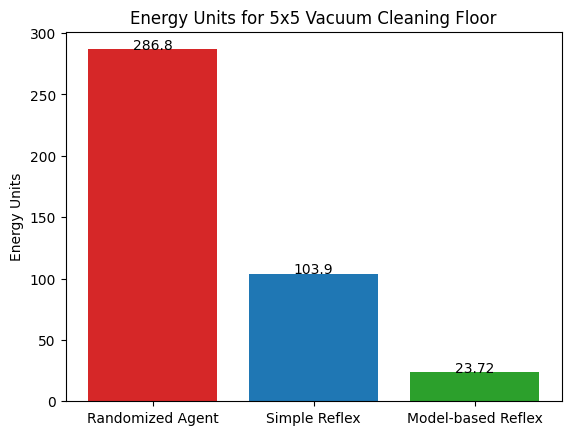

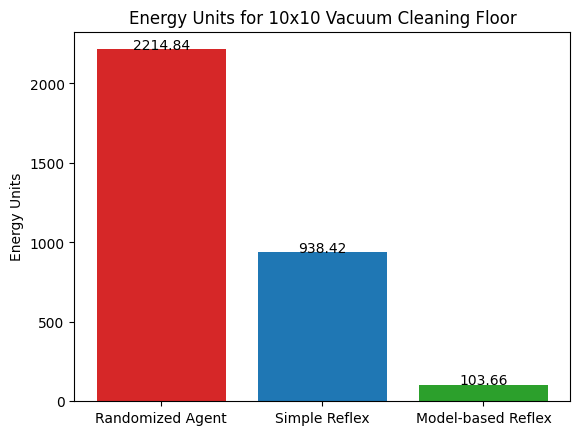

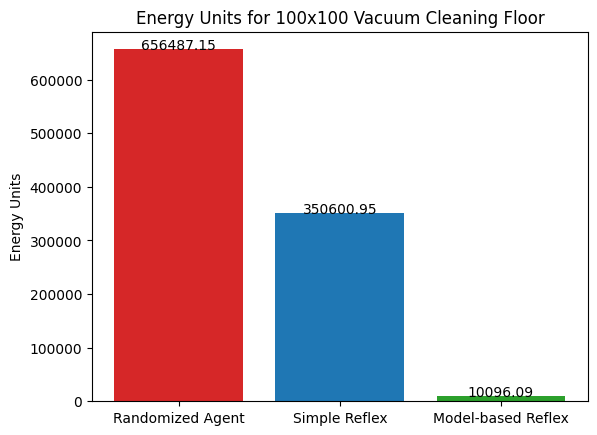

In [ ]:
from IPython.display import Image, display
display(Image('Vacuum5x5.png'))
display(Image('Vacuum10x10.png'))
display(Image('Vacuum100x100.png'))

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [ ]:
# Simple Reflex Agent: Since this agent uses random selection to decide on an action conditioned on its bumper status,
# this agent would function the same way in an unknown sized room, a rooms with hallways, and rooms with obstacles as
# an nxn sized room, as long as the bumpers work. However, the environment relies on n to allow the bumpers to work
# correctly, so since the agent relies on the bumpers functionality to work properly, it would possibly move outside
# these rooms or move into obstacles. Therefore, if the bumpers don’t work, the agent will violate the rules.

#Model-Based Agent: For rooms of unknown size, since this agent only relies on the bumpers to determine position,
# the implementation would allow the agent to work the same exact way as an nxn sized room. However, the environment
# relies on n to allow the bumpers to work correctly, so since the agent relies on the bumpers functionality to work
# properly, it would possibly move outside the room. For rooms with hallways connecting or rooms with obstacles,
# since the implementation relies on the agent receiving bumper sensors at the edges of the room, this agent won’t
# explore the whole room, resulting in possible scenarios where the agent leaves dirty squares and never finds the
# solution. This is because once the agent hits an obstacle, it will move south and subsequently move laterally
# until it hits another obstacle.





---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
